## House Prices - Using Advanced Regression Techniques

## Goal
To predict the sales price for each house.

### Data Description

##### train.csv - the training set
##### test.csv - the test set
##### data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
##### sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## Load the required libraries

In [52]:
## imports 

import pandas as pd 
import seaborn as sns
import numpy as np 
import  statsmodels.api as sm
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

## Data Loading

In [53]:
df = pd.read_csv('test.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [54]:
df1 = pd.read_csv("train.csv")
df1.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
df2 = pd.read_csv("sample_submission.csv")
df2.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


## Overview of dataset

In [56]:
# Number of rows and columns (Train test csv file)
print(df.shape)      

(1459, 80)


In [57]:
print(df2.shape)      

(1459, 2)


### Merge Datasets

In [58]:
# Merge df and df2 datasets (df-train test & df2-sample_submission)

merged_df = pd.merge(df, df2, on=['Id'], how='inner')
print(merged_df.shape)



(1459, 81)


In [59]:
# Saving the merged dataset
merged_path = r'G:\My Drive\Phase_3_Data_Science\merged_data.csv'
merged_df.to_csv(merged_path, index=False)
print(f"Merged dataset saved to {merged_path}")

Merged dataset saved to G:\My Drive\Phase_3_Data_Science\merged_data.csv


In [60]:
# Check the data structure
print(merged_df.info())         

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [61]:
# Summary statistics for numerical columns
print(merged_df.describe())

                Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min 

### Data types

In [62]:
print(merged_df.dtypes)

# Count unique values for categorical variables
categorical_columns = merged_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(f"{col}: {merged_df[col].nunique()} unique values")

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object
MSZoning: 5 unique values
Street: 2 unique values
Alley: 2 unique values
LotShape: 4 unique values
LandContour: 4 unique values
Utilities: 1 unique values
LotConfig: 5 unique values
LandSlope: 3 unique values
Neighborhood: 25 unique values
Condition1: 9 unique values
Condition2: 5 unique values
BldgType: 5 unique values
HouseStyle: 7 unique values
RoofStyle: 6 unique values
RoofMatl: 4 unique values
Exterior1st: 13 unique values
Exterior2nd: 15 unique values
MasVnrType: 4 unique values
ExterQual: 4 unique values
ExterCond: 5 unique values
Foundation: 6 unique values
BsmtQual: 4 unique values
BsmtCond: 4 unique values
BsmtExposure: 4 unique values
BsmtFinType1: 6 unique values
BsmtFinType2: 

### Check for Missing Values

In [63]:
# Count missing values per column
print(merged_df.isnull().sum())  


Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [64]:
# Proportion of missing values per column
print(merged_df.isnull().mean()) 

Id               0.000000
MSSubClass       0.000000
MSZoning         0.002742
LotFrontage      0.155586
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000685
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64


In [65]:
# Frequency count of each category
for col in categorical_columns:
    print(merged_df[col].value_counts())
    print("\n")

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64


Pave    1453
Grvl       6
Name: Street, dtype: int64


Grvl    70
Pave    37
Name: Alley, dtype: int64


Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64


Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64


AllPub    1457
Name: Utilities, dtype: int64


Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64


Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64


NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
NPkVill     14
BrDale      14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype

### Check for duplicate


In [66]:
# Check for duplicate rows
print(f"Duplicate Rows: {merged_df.duplicated().sum()}")

Duplicate Rows: 0


In [67]:
def find_duplicate_columns(merged_df):
    duplicate_columns = []
    for i in range(len(merged_df.columns)):
        for j in range(i + 1, len(merged_df.columns)):
            if merged_df.iloc[:, i].equals(merged_df.iloc[:, j]):
                duplicate_columns.append((merged_df.columns[i], merged_df.columns[j]))
    return duplicate_columns
# Check for duplicate columns
duplicates = find_duplicate_columns(merged_df)
if duplicates:
    print("Duplicate columns found:")
    for col1, col2 in duplicates:
        print(f" - {col1} is a duplicate of {col2}")
else:
    print("No duplicate columns found.")

No duplicate columns found.


### Checking variables correlation using correlation matrix

In [68]:
#Correlation of numerical 
merged_df.select_dtypes(include="number").corr()["SalePrice"]


Id               0.126165
MSSubClass      -0.205917
LotFrontage      0.501833
LotArea          0.715795
OverallQual      0.093643
OverallCond     -0.083753
YearBuilt        0.008187
YearRemodAdd     0.018889
MasVnrArea       0.150002
BsmtFinSF1       0.029932
BsmtFinSF2       0.002282
BsmtUnfSF        0.179678
TotalBsmtSF      0.209069
1stFlrSF         0.339335
2ndFlrSF         0.330785
LowQualFinSF     0.020544
GrLivArea        0.566654
BsmtFullBath    -0.050680
BsmtHalfBath    -0.007117
FullBath         0.326312
HalfBath         0.223001
BedroomAbvGr     0.786022
KitchenAbvGr     0.177035
TotRmsAbvGrd     0.625592
Fireplaces       0.213041
GarageYrBlt      0.000442
GarageCars       0.233308
GarageArea       0.250879
WoodDeckSF       0.109188
OpenPorchSF      0.151314
EnclosedPorch    0.094659
3SsnPorch       -0.055704
ScreenPorch      0.041524
PoolArea         0.071271
MiscVal          0.081200
MoSold           0.239906
YrSold          -0.134199
SalePrice        1.000000
Name: SalePr

### Top 10 features most correlated with SalePrice

In [69]:
# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Get correlations with 'SalePrice'
target_column = 'SalePrice'
correlations = correlation_matrix[target_column]

# Sort by absolute value of correlation (highest to lowest)
correlations_sorted = correlations.abs().sort_values(ascending=False)

# Display top 5 correlated columns
top_features = correlations_sorted.index[1:11]
print("Top 10 features most correlated with SalePrice:")
print(correlations.loc[top_features])

Top 10 features most correlated with SalePrice:
BedroomAbvGr    0.786022
LotArea         0.715795
TotRmsAbvGrd    0.625592
GrLivArea       0.566654
LotFrontage     0.501833
1stFlrSF        0.339335
2ndFlrSF        0.330785
FullBath        0.326312
GarageArea      0.250879
MoSold          0.239906
Name: SalePrice, dtype: float64


### Create a CSV file of Top 10 Features most correlated to SalePrice

In [70]:
Top_10_Correlated_Features_To_SalePrice = r'G:\My Drive\Group_8_Phas_3\top_10_correlated_features.csv'
correlations.loc[top_features].to_csv(Top_10_Correlated_Features_To_SalePrice, header=True)
print(f"Top correlated features saved to {Top_10_Correlated_Features_To_SalePrice}")

Top correlated features saved to G:\My Drive\Group_8_Phas_3\top_10_correlated_features.csv


### Visualization of Top 10 features most correlated with SalePrice using Heat Map

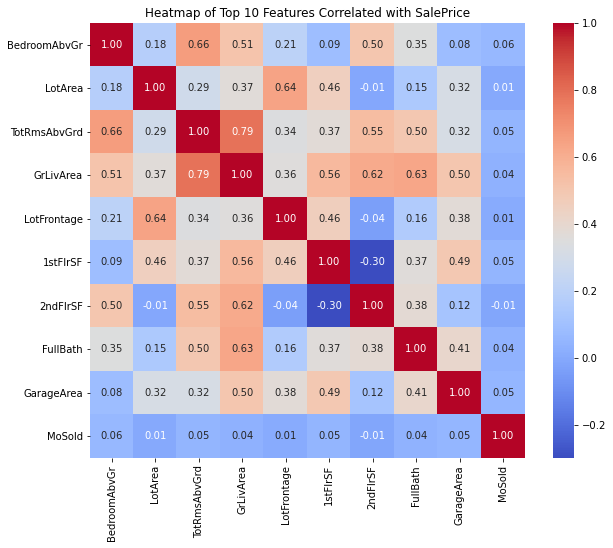

In [71]:
# Create a heatmap for the top correlated features
top_corr_matrix = merged_df[top_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Heatmap of Top 10 Features Correlated with SalePrice")
plt.show()


## Features Selection using Random forest and gradient boosting techniques

In [72]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

In [73]:
target_column = 'SalePrice'  
X = merged_df.drop(columns=[target_column]) 
y = merged_df[target_column]                

# Check for missing values in the merged dataset
X.fillna(X.median(), inplace=True)

# Convert categorical variables to dummy variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

In [74]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Initialize the model (Random Forest or Gradient Boosting)
model = RandomForestRegressor(random_state=42, n_estimators=100)
# model = GradientBoostingRegressor(random_state=42, n_estimators=100)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict and evaluate based on the test set
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")

# Derive feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display only the Top significant variables for predicting sales price
print("Top Significant Features:")
print(feature_importances.head(10))

Root Mean Squared Error: 2948.05
Top Significant Features:
         Feature  Importance
21  BedroomAbvGr    0.605457
3        LotArea    0.341649
35        MoSold    0.024095
0             Id    0.003091
2    LotFrontage    0.002401
13      1stFlrSF    0.001909
23  TotRmsAbvGrd    0.001402
16     GrLivArea    0.001370
27    GarageArea    0.001181
12   TotalBsmtSF    0.001114


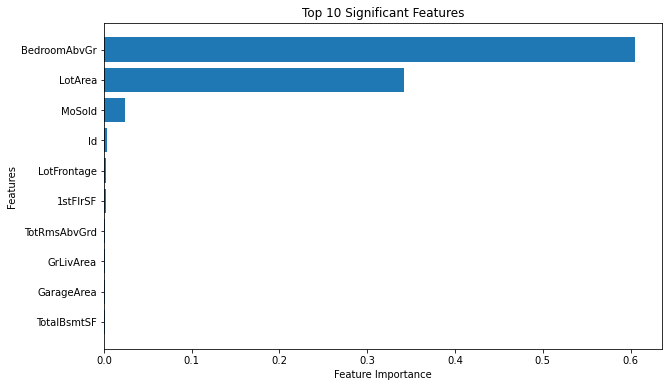

In [76]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'].head(10), feature_importances['Importance'].head(10))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Significant Features')
plt.gca().invert_yaxis()
plt.show()

## Features Selection using Lasso (L1 regularization) and Ridge (L2 regularization) regression

In [77]:
# Prepare the data
target_column = 'SalePrice'  
X = merged_df.drop(columns=[target_column])  
y = merged_df[target_column]               

# Handle missing values (if any)
X.fillna(X.median(), inplace=True)

# Convert categorical variables to dummy variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Lasso and Ridge)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
lasso = Lasso(alpha=0.1, random_state=42)  # Adjust alpha for regularization strength
ridge = Ridge(alpha=1.0, random_state=42)  # Adjust alpha for regularization strength

# Fit Lasso and Ridge models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Predict and evaluate
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)

lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

print(f"Lasso RMSE: {lasso_rmse:.2f}")
print(f"Ridge RMSE: {ridge_rmse:.2f}")


Lasso RMSE: 11.80
Ridge RMSE: 35.04


In [78]:
numerical_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


### Performing One-Hot Encoding 
This is used to convert categorical variables into numerical format suitable for machine learning models.

In [79]:
# Identify categorical columns
categorical_columns = merged_df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_columns)}")

Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [80]:
# Perform One-Hot Encoding
data_encoded = pd.get_dummies(merged_df, columns=categorical_columns, drop_first=True)
print(data_encoded.info())
print(data_encoded.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 229 entries, Id to SaleCondition_Partial
dtypes: float64(12), int64(26), uint8(191)
memory usage: 716.7 KB
None
     Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0  1461          20         80.0    11622            5            6   
1  1462          20         81.0    14267            6            6   
2  1463          60         74.0    13830            5            5   
3  1464          60         78.0     9978            6            6   
4  1465         120         43.0     5005            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  \
0       1961          1961         0.0       468.0  ...               0   
1       1958          1958       108.0       923.0  ...               0   
2       1997          1998         0.0       791.0  ...               0   
3       1998          1998        20.0       602.0  ...               0   
4  

In [81]:
encoded_data = r'G:\My Drive\Group_8_Phas_3\encoded_data.csv'
data_encoded.to_csv(encoded_data, index=False)
print(f"One-Hot Encoded dataset saved to {encoded_data}")

One-Hot Encoded dataset saved to G:\My Drive\Group_8_Phas_3\encoded_data.csv


# Modelling

In [82]:
import numpy as np

### Generating OLS model

In [83]:
# Loading the dataset
data = pd.read_csv('top_10_correlated_features.csv')

In [84]:
# data.isna().sum()


In [85]:
#print(data.dtypes)


In [86]:
data = pd.get_dummies(data, drop_first=True)
data.head()


,SalePrice,Unnamed: 0_2ndFlrSF,Unnamed: 0_BedroomAbvGr,Unnamed: 0_FullBath,Unnamed: 0_GarageArea,Unnamed: 0_GrLivArea,Unnamed: 0_LotArea,Unnamed: 0_LotFrontage,Unnamed: 0_MoSold,Unnamed: 0_TotRmsAbvGrd
0,0.786022,0,1,0,0,0,0,0,0,0
1,0.715795,0,0,0,0,0,1,0,0,0
2,0.625592,0,0,0,0,0,0,0,0,1
3,0.566654,0,0,0,0,1,0,0,0,0
4,0.501833,0,0,0,0,0,0,1,0,0


In [87]:
# # Check for missing values
# data.isna().sum()


In [88]:
# # Drop rows with missing values
# data = data.dropna()

In [89]:
# # Or, fill missing values with a strategy (e.g., mean)
# data.fillna(data.mean(), inplace=True)

In [90]:
import statsmodels.api as sm

# Ensure predictors are numeric and properly formatted
X = sm.add_constant(X)


In [91]:
data = data.apply(pd.to_numeric, errors='coerce')


In [92]:
#columns_to_drop = ['MoSold', 'GarageArea', 'FullBath', '2ndFlrSF', '1stFlrSF']


In [93]:
# Define the target and independent variables
target_column = 'SalePrice' 
X = data.drop(columns=[target_column])
y = data[target_column]

In [94]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### OLS Model using Statmodel

In [95]:
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()

In [96]:
# Summary of the OLS model
print("OLS Model Summary:")
print(ols_model.summary())

OLS Model Summary:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 09 Dec 2024   Prob (F-statistic):                nan
Time:                        11:04:18   Log-Likelihood:                 278.59
No. Observations:                   8   AIC:                            -541.2
Df Residuals:                       0   BIC:                            -540.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const  

c:\Users\ELITEBOOK\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\ELITEBOOK\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\ELITEBOOK\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\ELITEBOOK\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
c:\Users\ELITEBOOK\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1650: Runti

In [97]:
# Predict on the test set
X_test_sm = sm.add_constant(X_test)
ols_predictions = ols_model.predict(X_test_sm)
ols_predictions


8    0.339335
1    0.339335
dtype: float64

### Multiple Linear Regression using scikit-learn

In [98]:
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)


LinearRegression()

In [99]:
mlr_predictions = mlr_model.predict(X_test)

In [100]:
from sklearn.metrics import r2_score


In [101]:
# Evaluate the model
mse = mean_squared_error(y_test, mlr_predictions)
r2 = r2_score(y_test, mlr_predictions)

print("\nMultiple Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")



Multiple Linear Regression Performance:
Mean Squared Error (MSE): 0.07
R-squared (R²): -0.38


In [102]:
# Feature importance from the scikit-learn model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': mlr_model.coef_})
print("\nFeature Coefficients:")
print(coefficients)


Feature Coefficients:
                   Feature   Coefficient
0      Unnamed: 0_2ndFlrSF -8.550210e-03
1  Unnamed: 0_BedroomAbvGr  4.466869e-01
2      Unnamed: 0_FullBath -1.302235e-02
3    Unnamed: 0_GarageArea  2.775558e-17
4     Unnamed: 0_GrLivArea  2.273187e-01
5       Unnamed: 0_LotArea  0.000000e+00
6   Unnamed: 0_LotFrontage  1.624985e-01
7        Unnamed: 0_MoSold -9.942904e-02
8  Unnamed: 0_TotRmsAbvGrd  2.862572e-01


### Interpretation of Results:


### 1.0 Feature Coefficients:

The features coeffecients Shows the impact of each feature on SalePrice. With Positive coefficients increase SalePrice, while negative coefficients decrease it.
The following variables ;-BedroomAbvGr, GarageArea, GrLivArea, LotFrontage and TotRmsAbvGrd have a positive coeffiecient which shows they have an impact of increasing the sales price while 2ndFlrSF, FullBath, and MoSold have an impact of reducing the SalePrice


### 2.0 Multiple Linear Regression Metrics:

Multiple linear model shows a MSE = 0.07, which indicates a lower difference between the predicted and actual values of the house sale price prediction model.
R² of -0.38 shows that independent variables explains a -38% of the variance in House SalePrice